# Тесты

## Создание данных

In [21]:
import sys
sys.path.append('../')
import action
import extract

handle = open("examples.txt", "r")
text = handle.read()
handle.close()
list_, N = [0], 0
for i in range(len(text)):
    if text[i] == '.':
        last = i
    N += 1
    if N > 10000:
        list_.append(last)
        N = 0
root_list = []
for i in range(len(list_) - 1):
    root_list = root_list + action.construct_tree(text[list_[i] : list_[i + 1]])
     
df = extract.create_dataframe(root_list)
print(len(df))

3901


## Извлечение признаков

In [22]:
array = extract.extract_feat_from_dataframe(df)
print(array.shape)

68
(3901, 68)


## Потеря дисперсии при PCA

<IPython.core.display.Javascript object>


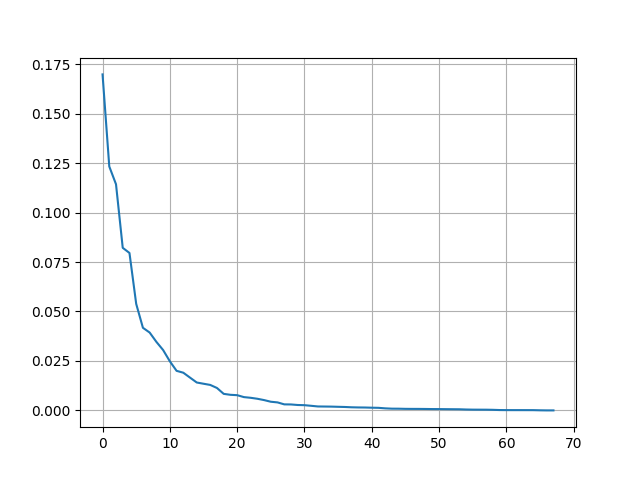

In [29]:
from sklearn.decomposition import PCA
data = array.copy()
pca = PCA(n_components = 68)
pca.fit(data)
ratio = pca.explained_variance_ratio_
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(ratio))], ratio)
plt.grid()

## Визуализация

### На плоскости

(3901, 2)


<IPython.core.display.Javascript object>


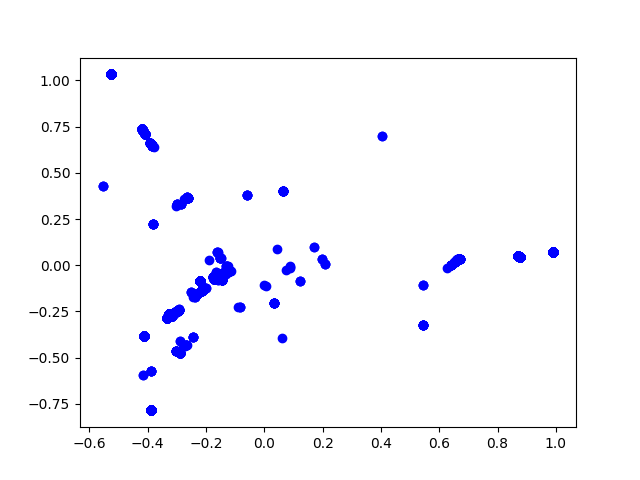

In [30]:
% matplotlib notebook
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
print(data.shape)
plt.plot([data[i][0] for i in range(data.shape[0])],
         [data[i][1] for i in range(data.shape[0])],
         'bo')

### В пространстве

<IPython.core.display.Javascript object>


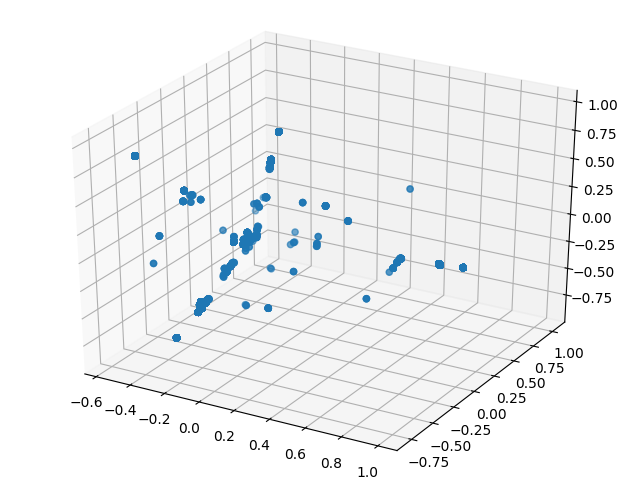

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
xs = [data[i][0] for i in range(data.shape[0])]
ys = [data[i][1] for i in range(data.shape[0])]
zs = [data[i][2] for i in range(data.shape[0])]
ax.scatter(xs, ys, zs)

## Кластеризация

In [52]:
from sklearn.cluster import AgglomerativeClustering as AC
data = array.copy()
pca = PCA(n_components = 10)
X = pca.fit_transform(data)
ac = AC(5, linkage = 'complete').fit(X)
y = ac.labels_

<IPython.core.display.Javascript object>


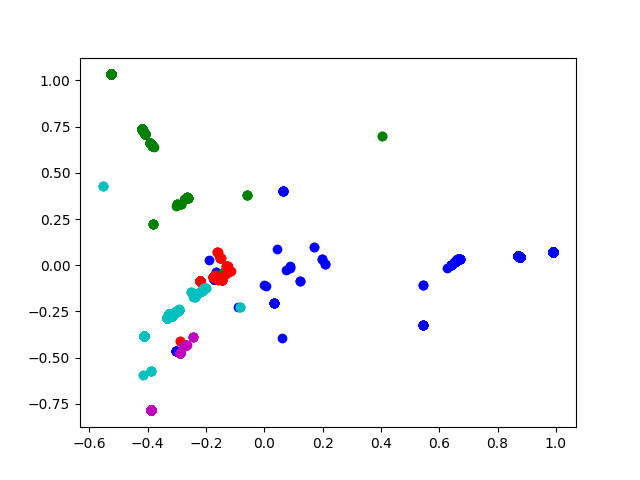

In [53]:
% matplotlib notebook
data = array.copy()
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
colors = ['bo', 'go', 'ro', 'co', 'mo']
for j in range(5):
    plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == j],
             [data[i][1] for i in range(data.shape[0]) if y[i] == j], colors[j])

<IPython.core.display.Javascript object>


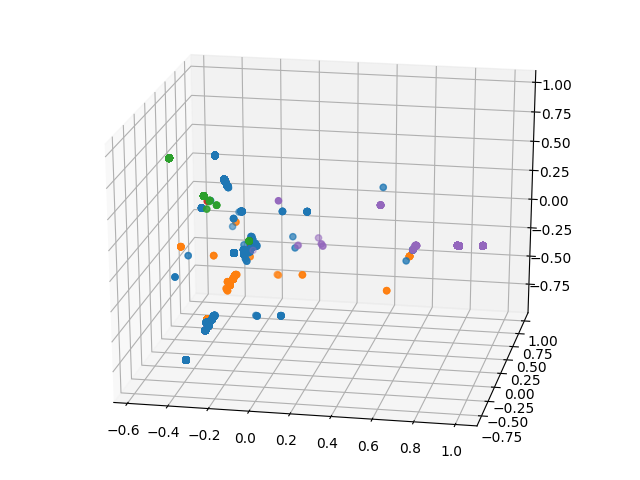

In [43]:
% matplotlib notebook
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
for j in range(6):
    xs = [data[i][0] for i in range(data.shape[0]) if y[i]== j]
    ys = [data[i][1] for i in range(data.shape[0]) if y[i]== j]
    zs = [data[i][2] for i in range(data.shape[0]) if y[i]== j]
    ax.scatter(xs, ys, zs)

In [54]:
import numpy as np
print(array.copy().shape)
print(np.array([y]).T.shape)
data = np.hstack((array.copy(), np.array([y]).T))
print(data.shape)

(3901, 68)
(3901, 1)
(3901, 69)


In [55]:
import pandas as pd
df = pd.read_csv('features.csv')
print(df.head(10))

           c0          c1        c2
0           а  cc:preconj     CCONJ
1         пес       nsubj  Nom_NOUN
2  подворотне         obl  Loc_NOUN
3    прижался        conj      VERB
4           и          cc     CCONJ
5     страдая       advcl      VERB
6       стена         obl  Loc_NOUN
7      решить        conj      VERB
8           и          cc     CCONJ
9      твердо      advmod       ADV


In [67]:
from sklearn.neighbors import KNeighborsClassifier as KNN
X = array.copy()
pca = PCA(n_components = 10)
X = pca.fit_transform(X)
Y = y.copy()
neigh = KNN(100).fit(X, Y)

In [68]:
import action
text = 'Молодой учитель Джек Торранс устраивается на работу в горный отель «Оверлук» сторожем на зиму и к концу осени переезжает туда со своей семьей: женой Венди и пятилетним сыном Денни. Шикарный отель пользуется дурной славой: в нем постоянно происходят странные и жуткие события. Денни — ясновидящий и телепат. Джек Торранс — бывший преподаватель и начинающий писатель, после женитьбы его характер испортился, он стал выпивать и распускать руки. Он случайно сломал руку своему сыну и сильно избил одного из своих учеников за то, что тот проколол шины его автомобиля. Эта работа нужна ему, чтобы успокоиться, написать свою пьесу, провести время, пока его друг не устроит его снова в школу. До него отель охранял некий Делберт Грейди, перебивший всю свою семью. '
root_list = action.construct_tree(text)
def print_tree(n, root):
    kids = root.kids
    if len(kids) != 0:
        for i in kids:
            print('-' * 3 * n, i[0].value.lemma, i[0].value.postag, i[0].value.morph, i[1])
            print_tree(n + 1, i[0])
    
for root in root_list:
    print(root.value.lemma, root.value.postag, root.value.morph, 'root')
    print_tree(1, root)   

test = extract.extract_data(root_list)

устраивается VERB {'Person': '3', 'Aspect': 'Imp', 'Number': 'Sing', 'Tense': 'Pres', 'VerbForm': 'Fin', 'Voice': 'Mid', 'Mood': 'Ind'} root
--- учитель NOUN {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Anim'} nsubj
------ молодой ADJ {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Anim'} amod
------ джек PROPN {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Anim'} appos
--------- торранс PROPN {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Anim'} flat
--- работа NOUN {'Case': 'Acc', 'Gender': 'Fem', 'Number': 'Sing', 'Animacy': 'Inan'} obl
------ на ADP {} case
--- отель NOUN {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Anim'} obl
------ в ADP {} case
------ горный ADJ {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Anim'} amod
------ оверлук PROPN {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing', 'Animacy': 'Inan'} appos
--------- « PUNCT {} punct
------ сторожем VERB {'Person': '

In [69]:
words = test['c0']
X = extract.extract_feat_from_dataframe(test, False)
X = pca.fit_transform(X)
print(X.shape)
print(pd.concat([test, pd.DataFrame(neigh.predict(X))], ignore_index = True, axis = 1))
print(text)

68
(29, 10)
              0          1          2  3
0       учитель      nsubj   Nom_NOUN  0
1        работа        obl   Acc_NOUN  3
2         отель        obl   Nom_NOUN  3
3         конец        obl   Dat_NOUN  3
4         осень        obl   Dat_NOUN  3
5    переезжает  parataxis       VERB  4
6          туда     advmod        ADV  1
7         семья        obl   Ins_NOUN  3
8          жена      appos   Ins_NOUN  3
9         отель      nsubj   Nom_NOUN  0
10       славой       iobj   Ins_NOUN  3
11  происходить  parataxis       VERB  4
12           он        obl   Loc_PRON  3
13    постоянно     advmod        ADV  1
14      событие      nsubj   Nom_NOUN  0
15     женитьба        obl   Gen_NOUN  3
16     характер        obj   Acc_NOUN  2
17        стать  parataxis       VERB  4
18           он      nsubj   Nom_PRON  0
19     выпивать      xcomp       VERB  1
20           он      nsubj   Nom_PRON  0
21     случайно     advmod        ADV  1
22         рука        obj   Acc_NOUN  2
23  

In [59]:
"""
SUBJ = 0
OBJ = 1
ADV = 2
VERB = 3
NONE = 4
"""

['SUBJ',
 'PLACE or OBJECT',
 'PLACE or OBJECT',
 'TIME',
 'TIME',
 'ADD_ACT',
 'PLACE',
 'OBJECT',
 'SUBJECT',
 'OBJECT',
 'ADD_ACT',
 'PLACE',
 'SUBJECT',
 'TIME',
 'SUBJECT']